<a href="https://colab.research.google.com/github/abosedealli/Stockprediction/blob/main/AR%20(TSA)%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Time Series AR Model

In [1]:
!pip install yfinance
!pip  install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [3]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.model_selection import train_test_split
ticker = "NFLX"
a_df = yf.download(ticker)['Low']
a_df = pd.DataFrame(a_df)

[*********************100%***********************]  1 of 1 completed


In [5]:
a_df = a_df.asfreq('d') # Alterating the frequency to day
a_df.index # Checking the frequency
a_df = a_df.fillna(method='ffill') # Fill missing values

# Delete unnamed column
a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed',case = False)],
          axis = 1, inplace = True)
a_df

,Low
Date,
2002-05-23 00:00:00-04:00,1.145714
2002-05-24 00:00:00-04:00,1.197143
2002-05-25 00:00:00-04:00,1.197143
2002-05-26 00:00:00-04:00,1.197143
2002-05-27 00:00:00-04:00,1.197143
...,...
2023-01-13 00:00:00-05:00,328.890015
2023-01-14 00:00:00-05:00,328.890015
2023-01-15 00:00:00-05:00,328.890015


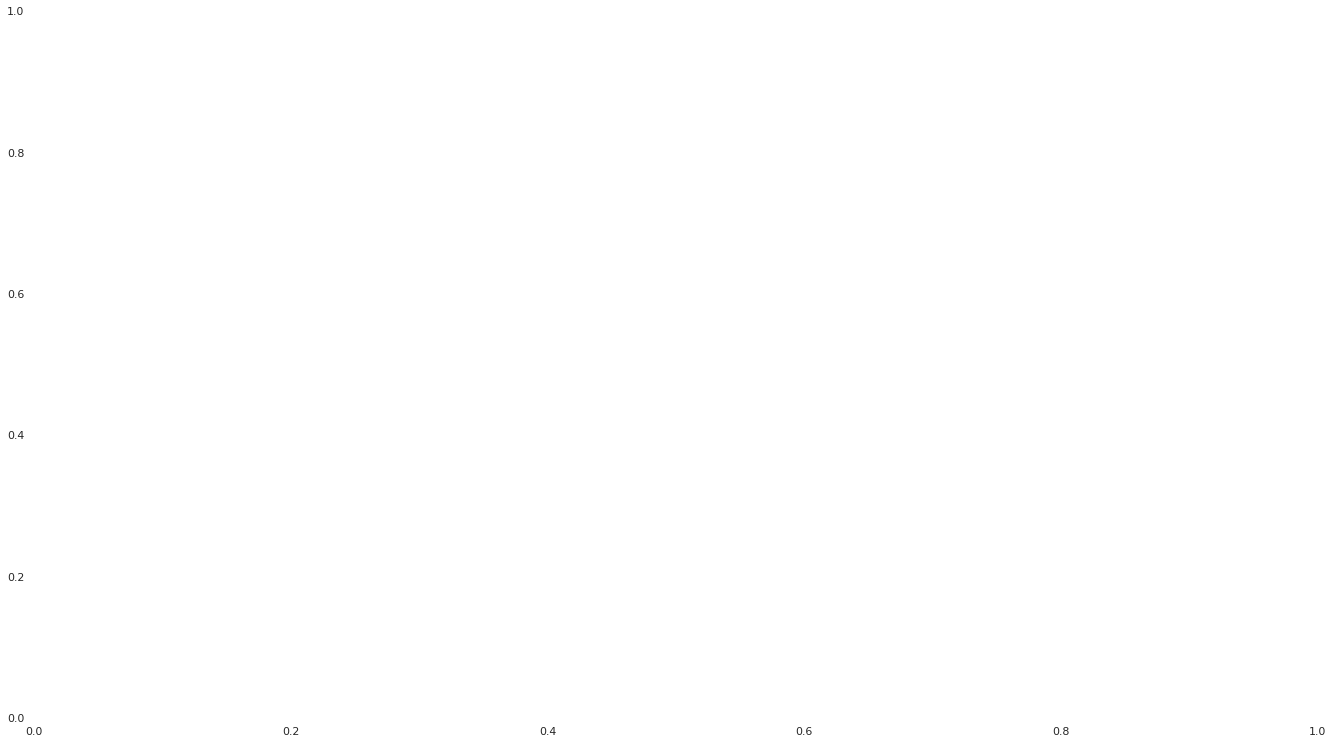

In [10]:
# Set style for seaborn plot

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid' : False})
# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(23, 13))

fig, ax = plt.subplots()
lags = ar_select_order(a_df, maxlag=30)


In [11]:
# Create our model using whole data set
model = AutoReg(a_df['Low'], lags.ar_lags)
model_fit = model.fit()

In [12]:
train_df = a_df.sample(frac=0.8, random_state=25)
test_df = a_df.drop(train_df.index)

In [13]:
train_model = AutoReg(a_df['Low'], 2500).fit(cov_type="HC0")

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [14]:
# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end+100, dynamic=True)


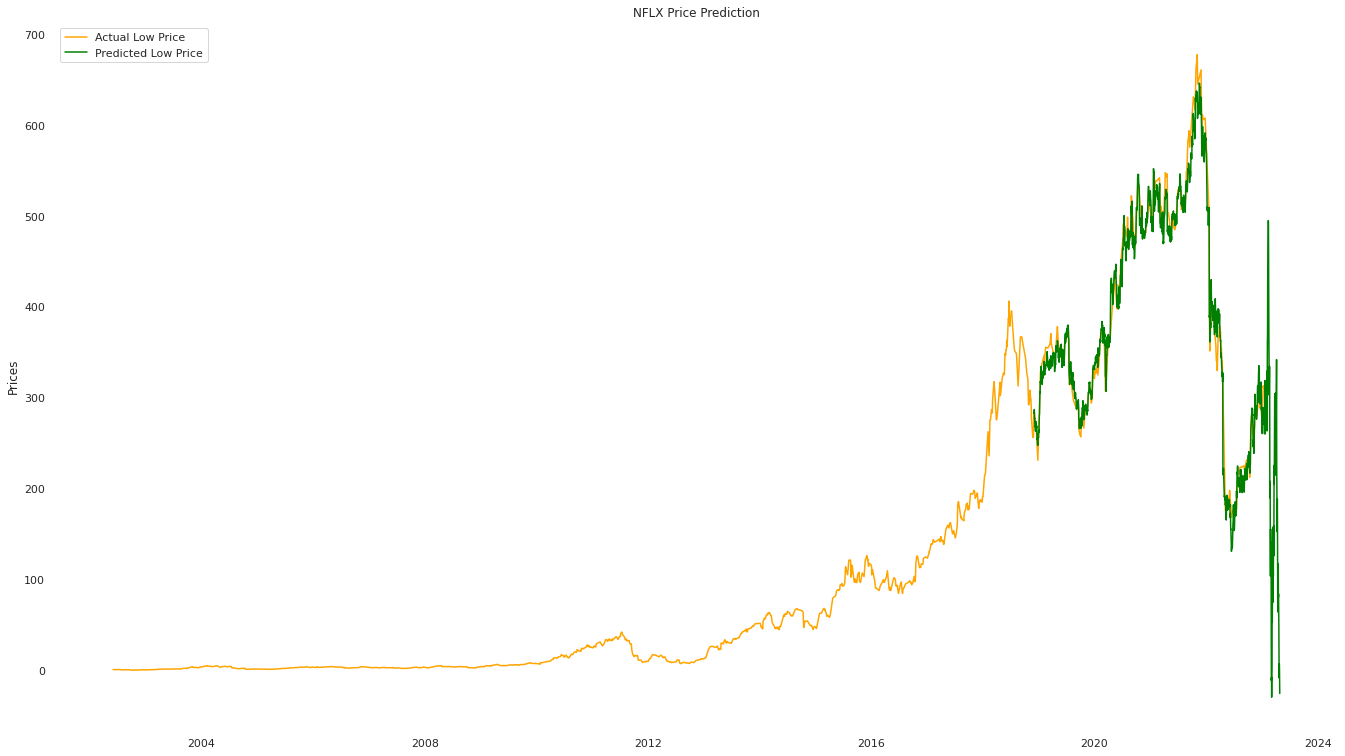

In [15]:
# Plot testing data with prediction
plt.plot(test_df['Low'], 'orange', label='Actual Low Price')
plt.plot(prediction, 'green', label='Predicted Low Price')
plt.title(f'{ticker} Price Prediction')
plt.ylabel("Prices")
plt.legend()
plt.show()

In [16]:
#  RMSE and MAPE  we will Calculate the RMSE and MAPE values
rmse = np.sqrt(np.mean((prediction - test_df['Low'])**2))
mape = np.mean(np.abs(prediction - test_df['Low']) / test_df['Low'])
print("RMSE:", rmse)
print("MAPE:", mape)


RMSE: 15.839921915942302
MAPE: 0.034021757938221174


# New Section
Calculating High Prices

In [17]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.model_selection import train_test_split
ticker = "NFLX"
a_df = yf.download(ticker)['Open']
a_df = pd.DataFrame(a_df)

a_df = a_df.asfreq('d') # Change frequency to day
a_df.index # Check frequency
a_df = a_df.fillna(method='ffill') # Fill missing values

# Delete unnamed column
a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed',case = False)],
         axis = 1, inplace = True)


a_df

# Set style for seaborn plot

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid' : False})
# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(23, 13))

[*********************100%***********************]  1 of 1 completed


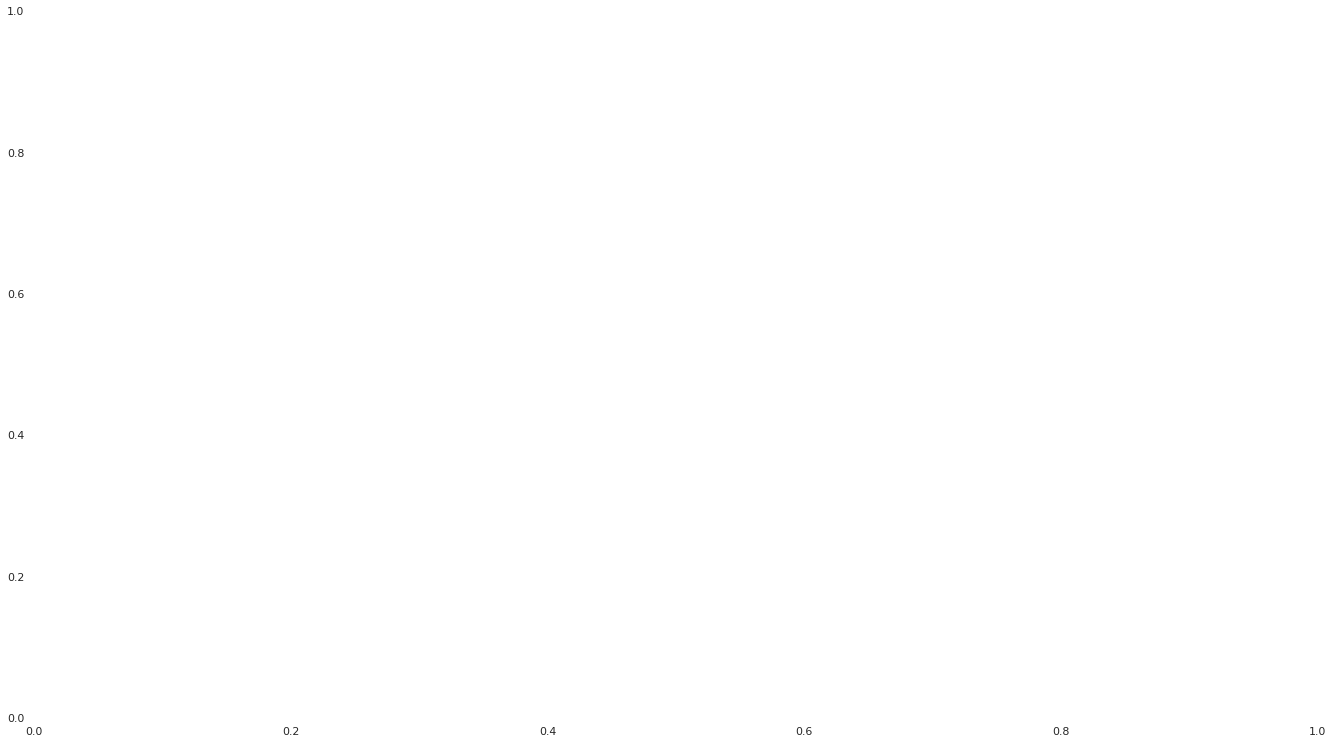

In [20]:
fig, ax = plt.subplots()

lags = ar_select_order(a_df, maxlag=30)

# Create our model using whole data set
model = AutoReg(a_df['Open'], lags.ar_lags)
model_fit = model.fit()


In [21]:
train_df = a_df.sample(frac=0.8, random_state=25)
test_df = a_df.drop(train_df.index)

In [22]:
train_model = AutoReg(a_df['Open'], 2500).fit(cov_type="HC0")

# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end+100, dynamic=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


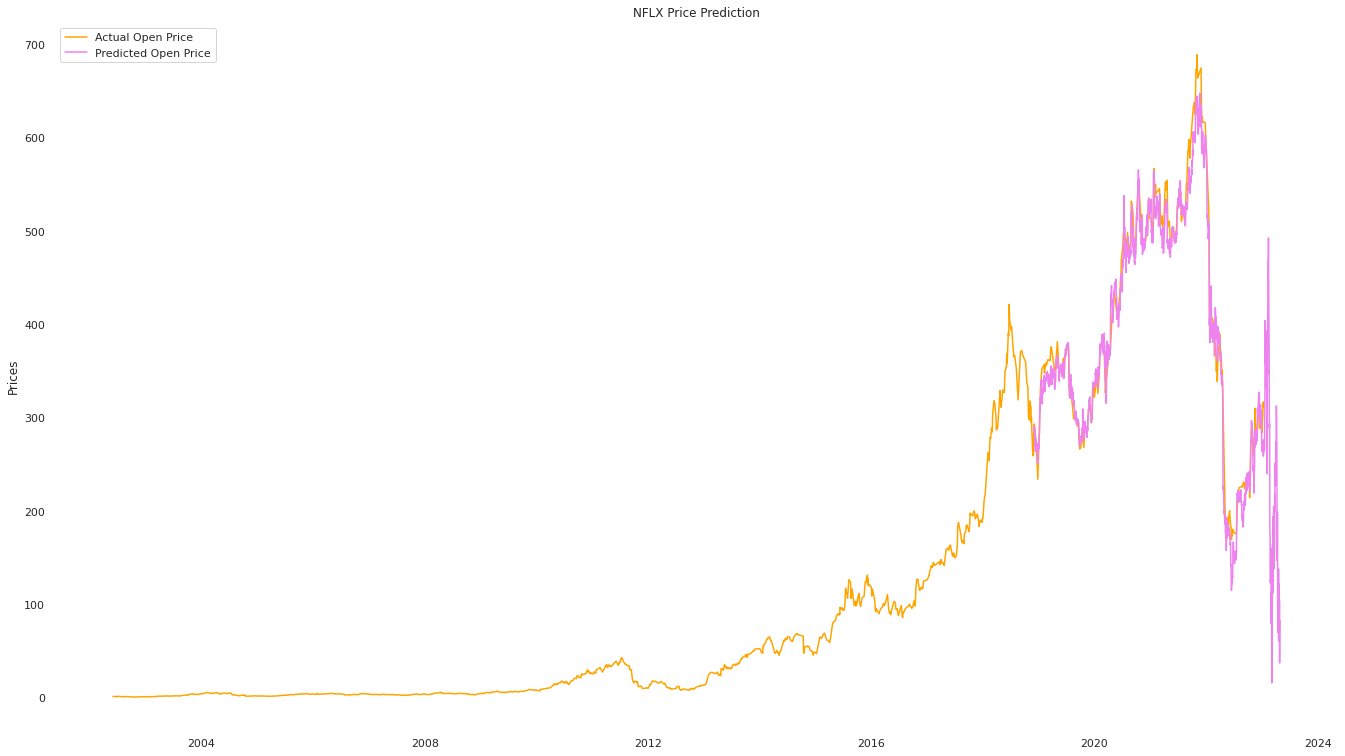

RMSE: 18.890421213113324
MAPE: 0.04033781682359086


In [24]:
# Plot testing data with prediction
plt.plot(test_df['Open'], 'orange', label='Actual Open Price')
plt.plot(prediction, 'violet', label='Predicted Open Price')
plt.title(f'{ticker} Price Prediction')
plt.ylabel("Prices")
plt.legend()
plt.show()

# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean((prediction - test_df['Open'])**2))
mape = np.mean(np.abs(prediction - test_df['Open']) / test_df['Open'])
print("RMSE:", rmse)
print("MAPE:", mape)

# New Section
Price for High was also calculated

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


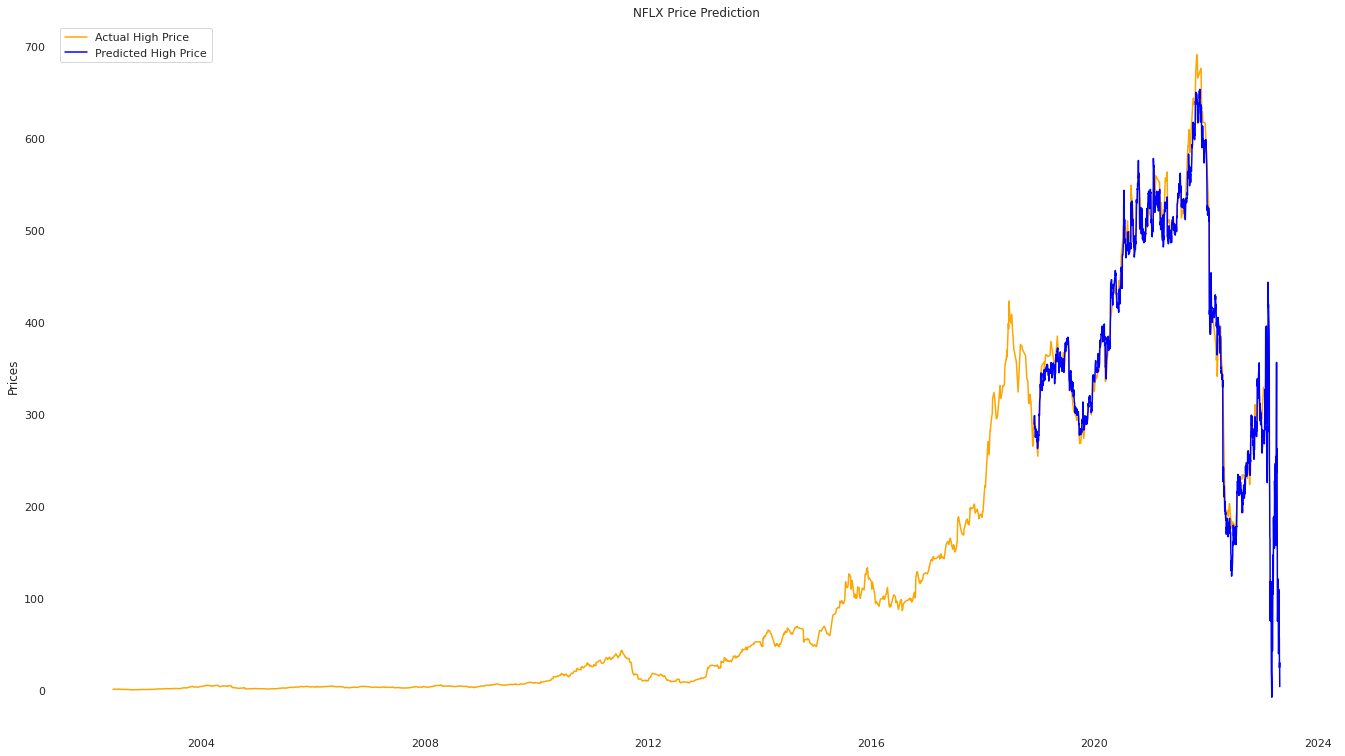

RMSE: 18.304909165618472
MAPE: 0.038517009544304336


In [25]:


from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.model_selection import train_test_split

ticker = "NFLX"
a_df = yf.download(ticker)['High']
a_df = pd.DataFrame(a_df)

a_df = a_df.asfreq('d') # Change frequency to day
a_df.index # Check frequency
a_df = a_df.fillna(method='ffill') # Fill missing values

# Delete unnamed column
a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed',case = False)],
          axis = 1, inplace = True)


a_df

# Set style for seaborn plot

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid' : False})
# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(23, 13))

fig, ax = plt.subplots()

lags = ar_select_order(a_df, maxlag=30)

# Create our model using whole data set
model = AutoReg(a_df['High'], lags.ar_lags)
model_fit = model.fit()



train_df = a_df.sample(frac=0.8, random_state=25)
test_df = a_df.drop(train_df.index)



train_model = AutoReg(a_df['High'], 2500).fit(cov_type="HC0")

# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end+100, dynamic=True)




# Plot testing data with prediction
plt.plot(test_df['High'], 'orange', label='Actual High Price')
plt.plot(prediction, 'blue', label='Predicted High Price')
plt.title(f'{ticker} Price Prediction')
plt.ylabel("Prices")
plt.legend()
plt.show()

# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean((prediction - test_df['High'])**2))
mape = np.mean(np.abs(prediction - test_df['High']) / test_df['High'])
print("RMSE:", rmse)
print("MAPE:", mape)

